In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd
from matplotlib import animation
import psycopg2
from datetime import datetime, timedelta
from pathlib import Path
import utils
from importlib import reload

In [4]:
data_folder = Path('../../data/new_york_311')
data_path = data_folder / 'data_311.csv'

orig_data = pd.read_csv(data_path)

C:\Users\efreiling\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
map_img = imread('../Images/map.png')

In [10]:
BBox = (-78.18450807772693, -73.70029199533596, 39.552555178881700, 40.912940566995660)

# Visualization

In [8]:
top_complaints = [
    'Noise - Residential',
    'HEAT/HOT WATER',
    'Street Condition',
    'Street Light Condition',
    'HEATING',
    'Blocked Driveway',
    'Illegal Parking',
    'PLUMBING',
    'Water System',
    'GENERAL CONSTRUCTION',
    'General Construction/Plumbing'
]

q = f''' 
SELECT
  Latitude,
  Longitude,
  created_date,
  borough,
  complaint_type
FROM
  public.three_one_one
WHERE complaint_Type in ({", ".join("'" + str(x) + "'" for x in top_complaints)})
ORDER BY created_date
LIMIT 100000;'''

df = utils.query_db(q)
df[2] = pd.to_datetime(df[2])
df = df.rename(columns={0: "Lat", 1: "Lng", 2: "Date", 3: "Borough", 4: "Complaint"})
df.head()

,Lat,Lng,Date,Borough,Complaint
0,40.638696019448100,-73.94696900027189,2010-01-01,Unspecified,HEATING
1,40.859443761094740,-73.89351726080064,2010-01-01,Unspecified,PLUMBING
2,40.657227870301040,-73.91744716788068,2010-01-01,Unspecified,HEATING
3,40.843592585789970,-73.93790379522149,2010-01-01,Unspecified,PLUMBING
4,40.605911495950230,-73.96701865818098,2010-01-01,Unspecified,PLUMBING


<IPython.core.display.Javascript object>


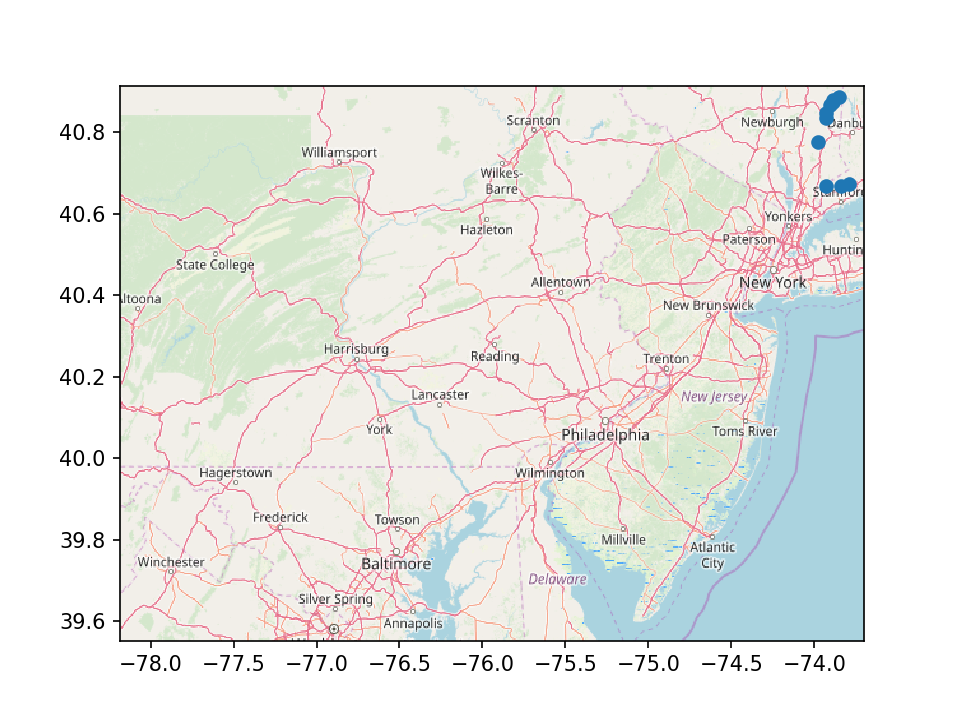

In [25]:
fig, ax = subplots()
x, y = [],[]
sc = ax.scatter(x,y)
num_iter = 10
counter = 0
window = 10


def animate(i):
    x = df['Lng'].values[i:i + window]
    y = df['Lat'].values[i:i + window]
    sc.set_offsets(c_[x,y])

ani = animation.FuncAnimation(fig, animate, 
                frames=10, interval=500, repeat=False) 
imshow(map_img, zorder=0, extent = BBox, aspect= 'auto')
show()